In [73]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "../data/kvadrati2/kvadrati.csv"
kvadrati_df = pd.read_csv(csv_file, encoding="utf-8")
kvadrati_df.head()

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url
0,1,"Notranjsko - kraška, Ilirska Bistrica, Hrušica",45.846179,14.230267,Prodaja,Parcela,Zazidljiva,4194 m2,NaN,37.000 €,Nina Hudnik,RONI NEPREMIČNINE d.o.o.,Šifra:=PP397815031525,NaN,Iščete primerno zemljišče za gradnjo ali inves...,https://mojikvadrati.com/nepremicnina/467410-p...
1,2,"Pomurska, Murska Sobota",46.662464,16.165526,Prodaja,Parcela,Zazidljiva,1898 m2,NaN,40 €/m2,Rajko Šimonka,Prips nepremičnine d.o.o.,Šifra:=P26-2022,NaN,Nedaleč od trgovskega središča prodamo zemljiš...,https://mojikvadrati.com/nepremicnina/373458-p...
2,3,"Podravska, Destrnik, Vintarovci",46.495602,15.864561,Prodaja,Parcela,Zazidljiva,646 m2,NaN,23.500 €,Melanija Raišp,CENTURY 21 Slovenija,Šifra:=100104-589,Lega=Jug/Zahod|Luksuz=Lep razgled/Bližina nara...,"ZEMLJIŠČE V VINTAROVCIH, DESTRNIKProdamo zemlj...",https://mojikvadrati.com/nepremicnina/453310-p...
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.687290,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...


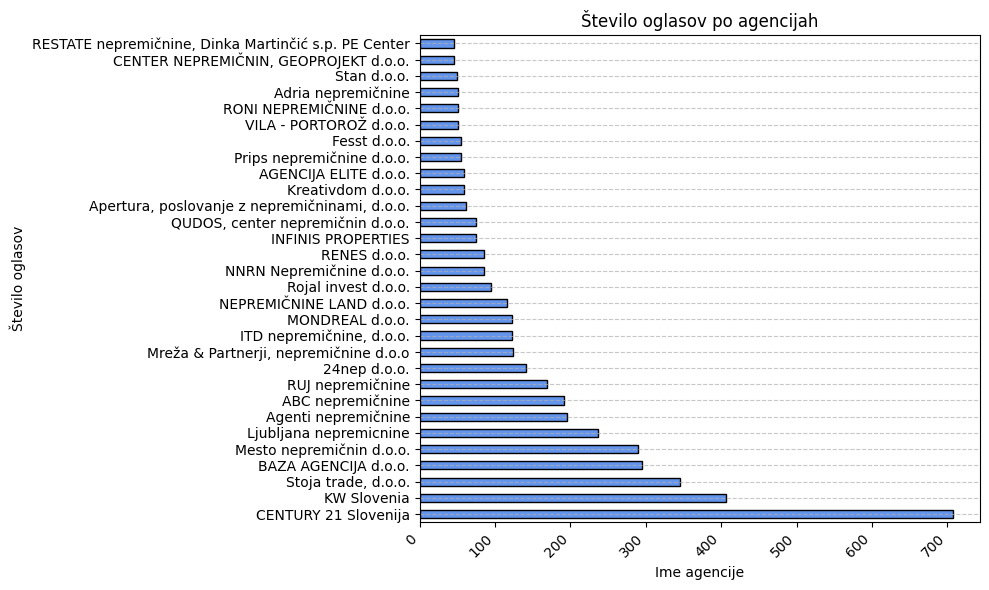

In [74]:
counts = kvadrati_df['prodajalec_agencija'].value_counts()
counts = counts[counts >= 45]

# # Nariši stolpični diagram
plt.figure(figsize=(10, 6))
counts.plot(kind='barh', color='cornflowerblue', edgecolor='black', )

plt.title('Število oglasov po agencijah')
plt.xlabel('Ime agencije')
plt.ylabel('Število oglasov')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
# Preštej vrednosti
counts = kvadrati_df['prodajalec_agencija'].value_counts()

# Pretvori v deleže
proportions = counts / counts.sum()

# Agencije >= 5%
main_agencije = proportions[proportions >= 0.02]

# Združi ostale
ostalo = proportions[proportions < 0.02].sum()

# Dodaj 'Ostalo' k rezultatu
stack_data = main_agencije.copy()
stack_data['Ostalo'] = ostalo


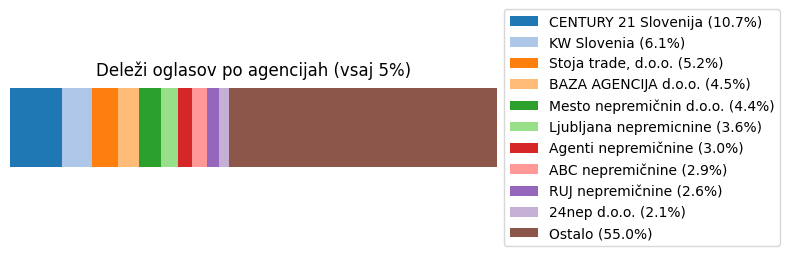

In [76]:
import matplotlib.pyplot as plt

# Pripravimo barve
colors = plt.cm.tab20.colors

# Pripravimo sliko
fig, ax = plt.subplots(figsize=(8, 2))  # Visok 1 stolpec

# Nariši "stolpec po stolpec"
left = 0
for i, (label, value) in enumerate(stack_data.items()):
    ax.barh(y=0, width=value, left=left, color=colors[i % len(colors)], label=f'{label} ({value:.1%})')
    left += value  # zamik za naslednji segment

# Stilizacija
ax.set_xlim(0, 1)
ax.set_title('Deleži oglasov po agencijah (vsaj 5%)')
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [77]:
import numpy as np

def get_velikost(v):
    split_v = str(v).split()
    try:
        return float(split_v[0].replace(',', '.'))
    except ValueError:
        return None

def get_cena(c):
    c = str(c).split('€')[0].split('EUR')[0].replace('.', '').replace(',', '.').strip()

    try:
        return float(c)
    except ValueError:
        return None

def očisti_ceno(cena_str, velikost):
    if pd.isna(cena_str):
        return np.nan
    cena_str = str(cena_str).lower().replace("€", "").replace("€", "").replace(".", "").strip()
    
    try:
        if "m2" in cena_str:
            vrednost_na_m2 = float(cena_str.replace("m2", "").strip())
            return vrednost_na_m2 * velikost
        else:
            return float(cena_str)
    except:
        return np.nan

In [78]:
kvadrati_df['velikost_clean'] = kvadrati_df['velikost'].apply(get_velikost)
kvadrati_df['cena_clean'] = kvadrati_df.apply(lambda row: očisti_ceno(row['cena'], row['velikost']), axis=1)
kvadrati_df['cena_na_m2'] = kvadrati_df['cena_clean'] / kvadrati_df['velikost_clean']

kvadrati_cene = kvadrati_df[(kvadrati_df['cena_na_m2'].notnull()) & (kvadrati_df['cena_na_m2'] < 15000) & (kvadrati_df['cena_na_m2'] > 50)]
kvadrati_cene

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url,velikost_clean,cena_clean,cena_na_m2
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.687290,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...,223.60,110000.0,491.949911
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...,322.60,579000.0,1794.792312
6,7,"Ljubljana okolica, Velike Lašče",45.832469,14.638310,Prodaja,Parcela,Zazidljiva,925 m2,NaN,110.000 €,NaN,Bamba nepremičnine Tanko Franc s.p.,NaN,NaN,"VELIKE LAŠČEVELIKE LAŠČE- center, prodamo stav...",https://mojikvadrati.com/nepremicnina/469046-p...,925.00,110000.0,118.918919
7,8,"Ljubljana okolica, Škofljica",45.985384,14.572855,Prodaja,Hiša,Samostojna,142 m2,2024.0,585.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=142 m2|Parcela:=599 m2|Zgraj...,NaN,ŠKOFLJICA – NOVOGRADNJA – SAMOSTOJNE HIŠEŠKOFL...,https://mojikvadrati.com/nepremicnina/449826-p...,142.00,585000.0,4119.718310
8,9,"Ljubljana, Vič-Rudnik, Trnovo",43.672248,18.448815,Prodaja,Hiša,Dvojček,217 m2,2020.0,864.000 €,NIKO MAUČEC,Mesto nepremičnin d.o.o.,Velikost (neto):=217 m2|Velikost (bruto):=217 ...,Dodatno=Vrt/Terasa/Pokrito parkirišče|Priključ...,"Hiša dvojček v Trnovskem predmestju(P+1, novog...",https://mojikvadrati.com/nepremicnina/247131-p...,217.00,864000.0,3981.566820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,6792,"Ljubljana, Šiška",46.073720,14.485868,Prodaja,Stanovanje,4-sobno,93.1 m2,1983.0,398.000 €,Urška Hočevar,Stan d.o.o.,Velikost (bruto):=93.1 m2|Zgrajeno:=1983|Adapt...,Dodatno=Dvigalo/Balkon/Parkirišče,"LJ. ŠIŠKA, DRAVLJE, BLIŽINA ZELENIH POVRŠINide...",https://mojikvadrati.com/nepremicnina/482910-p...,93.10,398000.0,4274.973147
6776,6793,"Ljubljana, Vič-Rudnik, Rudnik",50.444777,22.244033,Prodaja,Stanovanje,4-sobno,97.2 m2,2020.0,470.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=97.2 m2|Nadstropje:=1|Zgraje...,Dodatno=Balkon/Dvigalo,"Ljubljana, Peruzzijeva ulica –Vila Bober, stan...",https://mojikvadrati.com/nepremicnina/482529-p...,97.20,470000.0,4835.390947
6777,6794,Umag,45.432359,13.522410,Prodaja,Stanovanje,2-sobno,65 m2,2019.0,235.000 €,Sara Ducman,INFINIS PROPERTIES,Velikost (bruto):=65 m2|Nadstropje:=Pritličje|...,Ogrevanje=Toplotna črpalka/Talno gretje|Luksuz...,Prodamo čudovito 2-sobno stanovanje v luksuzne...,https://mojikvadrati.com/nepremicnina/473926-p...,65.00,235000.0,3615.384615
6778,6795,"Goriška, Idrija",46.002398,14.027301,Prodaja,Poslovni prostor,Neživilska trgovina,309.13 m2,1980.0,300.000 €,Marko Udovč,REVESTUM d.o.o.,Velikost (bruto):=309.13 m2|Nadstropje:=Pritli...,Ogrevanje=Toplotna črpalka,Poslovni prostor - prodajalna v IdrijiPoslovni...,https://mojikvadrati.com/nepremicnina/472166-p...,309.13,300000.0,970.465500


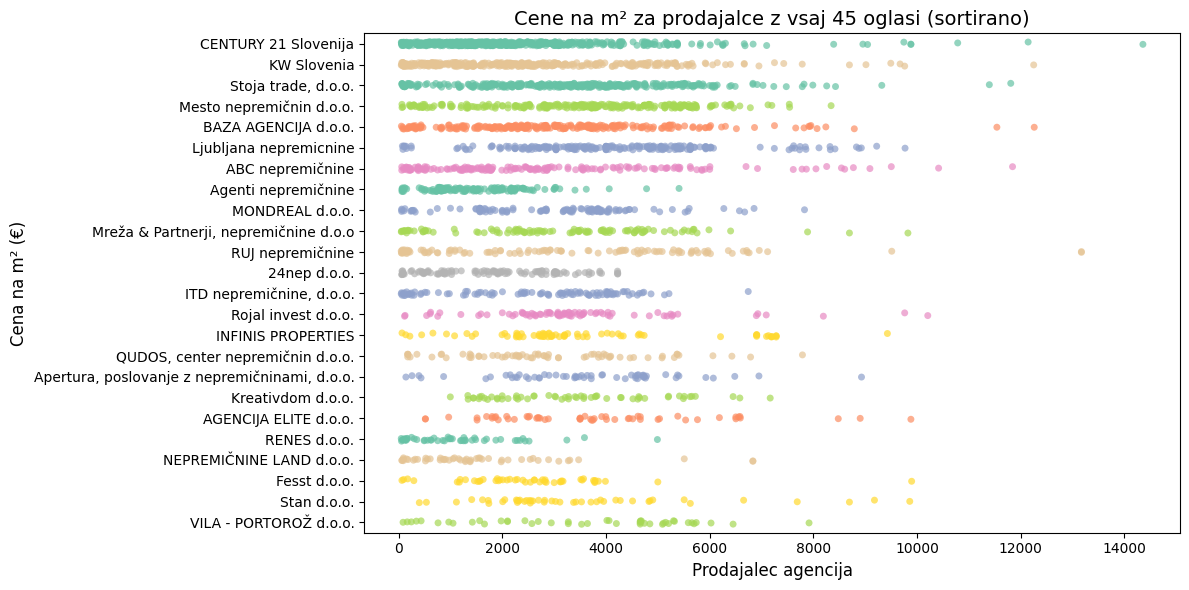

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = kvadrati_cene['prodajalec_agencija'].value_counts()

# Izberi samo agencije z vsaj 45 vrsticami
valid_agencies = counts[counts >= 45].sort_values().index

# Filtriraj DataFrame, da vsebuje le validne agencije
filtered_df = kvadrati_cene[kvadrati_cene['prodajalec_agencija'].isin(valid_agencies)]

ordered_agencies = counts[counts >= 45].sort_values(ascending=False).index

# Ustvari scatter plot za filtrirane in sortirane agencije
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=kvadrati_cene,
    y='prodajalec_agencija',
    x='cena_na_m2',
    order=ordered_agencies,
    alpha=0.7,
    hue='prodajalec_agencija',
    palette='Set2', 
    legend=None
)
plt.title('Cene na m² za prodajalce z vsaj 45 oglasi (sortirano)', fontsize=14)
plt.xlabel('Prodajalec agencija', fontsize=12)
plt.ylabel('Cena na m² (€)', fontsize=12)
plt.tight_layout()

plt.show()


Ljubljana nepremičnine ima veliko nepremičnin okoli 8000 e/m2.

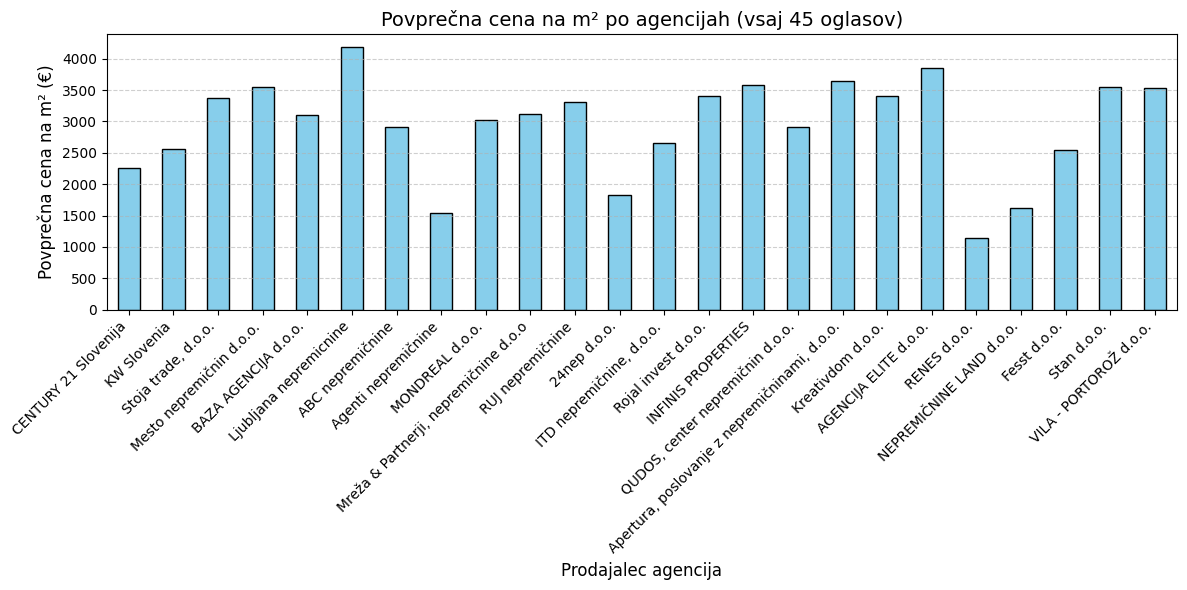

In [85]:
avg_price_per_agency = filtered_df.groupby('prodajalec_agencija')['cena_na_m2'].mean()

# Sortiramo po številu oglasov (kot prej)
avg_price_per_agency = avg_price_per_agency.loc[ordered_agencies]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

avg_price_per_agency.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Povprečna cena na m² po agencijah (vsaj 45 oglasov)', fontsize=14)
plt.xlabel('Prodajalec agencija', fontsize=12)
plt.ylabel('Povprečna cena na m² (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Agenti nepremičnine in Renes d.o.o. imajo precej nizke cene.